In [512]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import Data

In [513]:
df = pd.read_csv("/content/water_potability.csv")
df.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0


In [514]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [516]:
df.shape

(3276, 10)

In [517]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

Missing Values Handling

In [518]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [519]:
df.drop(columns=['Sulfate', 'Trihalomethanes'], inplace=True)

In [520]:
df.head(3)

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0


In [521]:
df['ph'] = df['ph'].fillna(df['ph'].mean())

In [522]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Conductivity,0
Organic_carbon,0
Turbidity,0
Potability,0


Removing Duplicates

In [523]:
df.shape

(3276, 8)

In [524]:
df.drop_duplicates(inplace=True)

In [525]:
df.shape

(3276, 8)

Outlier Remove

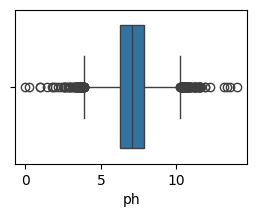

In [526]:
plt.figure(figsize=(3,2))
sns.boxplot(x='ph', data=df)
plt.show()

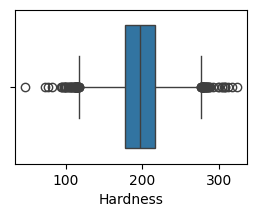

In [527]:
plt.figure(figsize=(3,2))
sns.boxplot(x='Hardness', data=df)
plt.show()

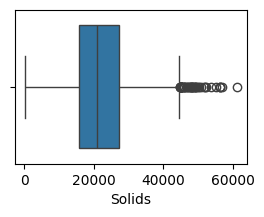

In [528]:
plt.figure(figsize=(3,2))
sns.boxplot(x='Solids', data=df)
plt.show()

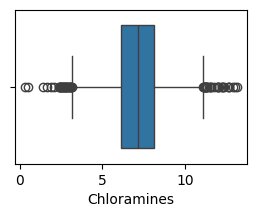

In [529]:
plt.figure(figsize=(3,2))
sns.boxplot(x='Chloramines', data=df)
plt.show()

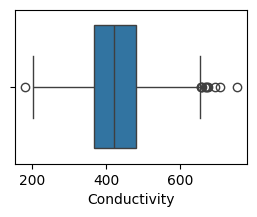

In [530]:
plt.figure(figsize=(3,2))
sns.boxplot(x='Conductivity', data=df)
plt.show()

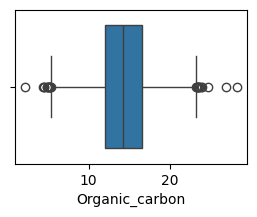

In [531]:
plt.figure(figsize=(3,2))
sns.boxplot(x='Organic_carbon', data=df)
plt.show()

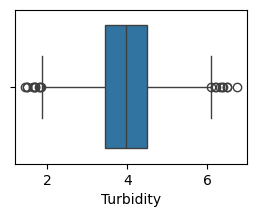

In [532]:
plt.figure(figsize=(3,2))
sns.boxplot(x='Turbidity', data=df)
plt.show()

In [533]:
# As Outliers are detected in Solids and Conductivity. Also scaling problems occur at the time of input in these
# these two that's why we are dropping these two columns

df.drop(columns=['Solids', 'Conductivity'], inplace=True)

In [534]:
df.head(3)

,ph,Hardness,Chloramines,Organic_carbon,Turbidity,Potability
0,7.080795,204.890455,7.300212,10.379783,2.963135,0
1,3.716080,129.422921,6.635246,15.180013,4.500656,0
2,8.099124,224.236259,9.275884,16.868637,3.055934,0


Plotting data for ckecking classification

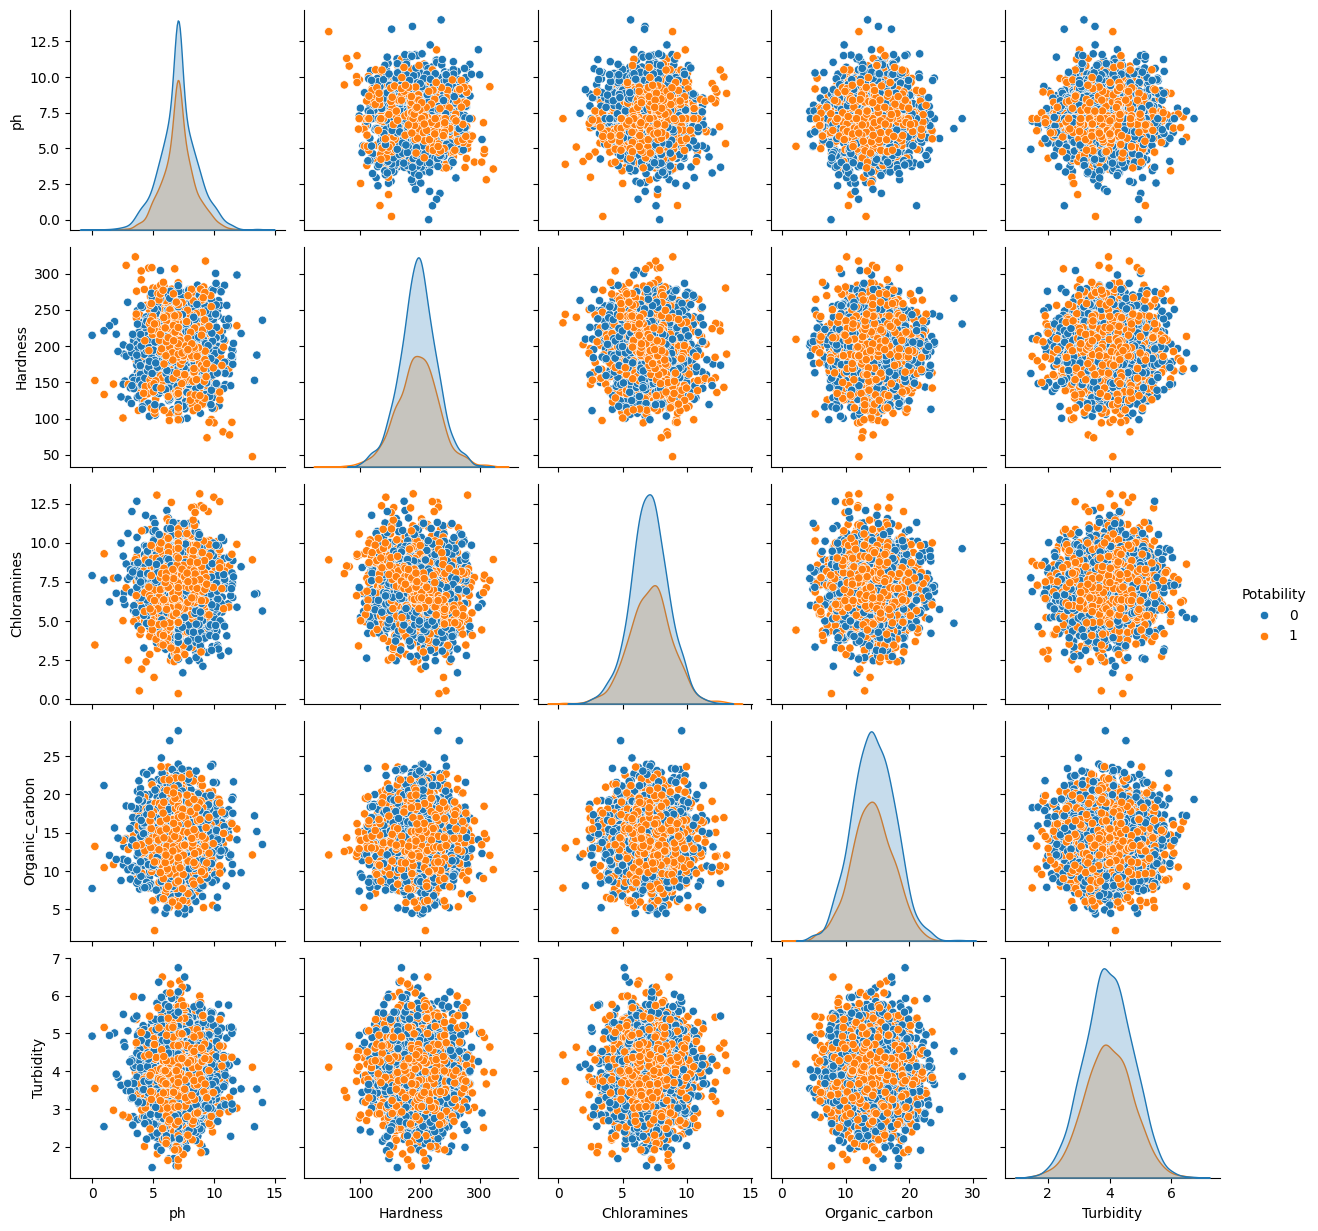

In [535]:
sns.pairplot(data=df, hue='Potability')
plt.show()

Define Input and Output

In [536]:
x = df.iloc[:,:-1]
y = df['Potability']

Bias Checking

In [537]:
df['Potability'].value_counts()

,count
Potability,
0,1998
1,1278


Perform Sampling

In [538]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ro = RandomOverSampler()
x, y = ro.fit_resample(x,y)

# Check class distribution after oversampling
print("Balanced counts:", Counter(y))

Balanced counts: Counter({0: 1998, 1: 1998})


In [539]:
# Convert back into a DataFrame for inspection
df = pd.DataFrame(x, columns=df.drop("Potability", axis=1).columns)
df["Potability"] = y

df["Potability"].value_counts()

,count
Potability,
0,1998
1,1998


Create Training and Testing Data

In [540]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Apply ensemble learning to train a Classification Model

In [541]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [542]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [543]:
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.5228410513141427, 0.50125)

In [544]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [545]:
dt.score(x_train, y_train), lr.score(x_test, y_test)

(1.0, 0.50125)

In [546]:
# Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [547]:
nb.score(x_train, y_train), lr.score(x_test, y_test)

(0.5556946182728411, 0.50125)

In [548]:
# SVM
sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [549]:
sv.score(x_train, y_train), lr.score(x_test, y_test)

(0.5228410513141427, 0.50125)

In [550]:
# Applied Voting Classifier
from sklearn.ensemble import VotingClassifier

li = [("model1", DecisionTreeClassifier()), ("model2", DecisionTreeClassifier()), ("model3", SVC()), ("model4", GaussianNB())]
vc = VotingClassifier(li, weights=[3, 2, 5, 5])
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('model1', DecisionTreeClassifier()),
                             ('model2', DecisionTreeClassifier()),
                             ('model3', SVC()), ('model4', GaussianNB())],
                 weights=[3, 2, 5, 5])

In [551]:
vc.score(x_train, y_train), lr.score(x_test, y_test)

(0.695244055068836, 0.50125)

In [552]:
# Applied Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [553]:
rfc.score(x_train, y_train), lr.score(x_test, y_test)

(1.0, 0.50125)

In [554]:
# Artificial Neural Network
import tensorflow
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

ann = Sequential()

ann.add(Dense(6, input_dim=5, activation="relu")) # Hidden layer 1
ann.add(Dense(4, activation="relu")) # Hidden Layer 2
ann.add(Dense(2, activation="relu")) # Hidden Layer 3
ann.add(Dense(1, activation="sigmoid")) # Output Layer

ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
ann.fit(x_train, y_train, batch_size=100, epochs=50)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5035 - loss: 0.6931
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4969 - loss: 0.6931
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5003 - loss: 0.6932
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5074 - loss: 0.6931
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4966 - loss: 0.6932
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4773 - loss: 0.6932
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5019 - loss: 0.6932
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4980 - loss: 0.6932
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5057 - loss: 0.6931
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4970 - loss: 0.6932
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4972 - loss: 0.6932
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5145 - loss: 0.6931


In [555]:
from sklearn.metrics import accuracy_score

#
pred1 = ann.predict(x_train)
pred_data1 = []

for i in pred1:
  if i[0] >= 0.5:
    pred_data1.append(1)
  else:
    pred_data1.append(0)

#
pred2 = ann.predict(x_test)
pred_data2 = []

for i in pred2:
  if i[0] >= 0.5:
    pred_data2.append(1)
  else:
    pred_data2.append(0)

accuracy_score(y_train, pred_data1), accuracy_score(y_test, pred_data2)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(0.5018773466833542, 0.4925)

Performing cross-validation to determine the maximum accuracy of all models

In [556]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# --- Voting Classifier ---
li = [
    ("DecisionTree1", DecisionTreeClassifier(random_state=42)),
    ("DecisionTree2", DecisionTreeClassifier(random_state=42)),
    ("SVM", SVC(probability=True)),
    ("NaiveBayes", GaussianNB())
]
vc = VotingClassifier(estimators=li, voting="soft", weights=[5, 4, 7, 7])

# --- Random Forest ---
rfc = RandomForestClassifier(n_estimators=50, random_state=42)

# --- Stratified K-Fold ---
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# --- Models dictionary ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Voting Classifier": vc,
    "Random Forest": rfc
}

# --- Cross-validation comparison ---
results = {}
for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=skf)
    results[name] = {
        "Scores": scores,
        "Mean Accuracy": scores.mean(),
        "Std Dev": scores.std()
    }

# --- Display results ---
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Scores: {metrics['Scores']}")
    print(f"  Mean Accuracy: {metrics['Mean Accuracy']:.4f}")
    print(f"  Std Dev: {metrics['Std Dev']:.4f}")
    print()

Logistic Regression:
  Scores: [0.5075     0.5125     0.525      0.51       0.51       0.4975
 0.48621554 0.50125313 0.5037594  0.5112782 ]
  Mean Accuracy: 0.5065
  Std Dev: 0.0098

Decision Tree:
  Scores: [0.6725     0.7475     0.6875     0.6925     0.69       0.7175
 0.68671679 0.67919799 0.66165414 0.70175439]
  Mean Accuracy: 0.6937
  Std Dev: 0.0231

SVM:
  Scores: [0.5175     0.5025     0.5225     0.5025     0.53       0.55
 0.51879699 0.5037594  0.50125313 0.52380952]
  Mean Accuracy: 0.5173
  Std Dev: 0.0148

Naive Bayes:
  Scores: [0.5525     0.5125     0.5575     0.57       0.55       0.5775
 0.53634085 0.52130326 0.53634085 0.56892231]
  Mean Accuracy: 0.5483
  Std Dev: 0.0204

Voting Classifier:
  Scores: [0.6725     0.7475     0.6875     0.6925     0.69       0.7175
 0.68671679 0.67919799 0.66165414 0.70175439]
  Mean Accuracy: 0.6937
  Std Dev: 0.0231

Random Forest:
  Scores: [0.695      0.7725     0.75       0.7475     0.7225     0.7775
 0.74937343 0.74185464 0.734335

Grid Search for Voting Classifier of Best Model

In [562]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],          # number of trees
    "max_depth": [None, 5, 10, 20],          # depth of each tree
    "min_samples_split": [2, 5, 10],         # minimum samples to split a node
    "min_samples_leaf": [1, 2, 4],           # minimum samples at a leaf
    "bootstrap": [True, False]               # whether to use bootstrap samples
}

# Initialize Random Forest
rfc = RandomForestClassifier(random_state=42)

# Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring="accuracy",  # optimize for accuracy
    n_jobs=-1            # use all CPU cores
)

# Fit on training data
grid_search.fit(x_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.6936864241001566


Train the Best Model with Best Parameters

In [563]:
# Best parameters from GridSearchCV
best_params = {
    "bootstrap": True,
    "max_depth": 20,
    "min_samples_leaf": 1,
    "min_samples_split": 2,
    "n_estimators": 200
}

# Build the optimized Random Forest model
best_rfc = RandomForestClassifier(**best_params, random_state=42)

# Train the model
best_rfc.fit(x_train, y_train)

# Evaluate on test set
y_pred = best_rfc.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.71375

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70       394
           1       0.71      0.75      0.73       406

    accuracy                           0.71       800
   macro avg       0.71      0.71      0.71       800
weighted avg       0.71      0.71      0.71       800


Confusion Matrix:
 [[267 127]
 [102 304]]


Saving the best model for Using

In [564]:
import pickle

# Save the trained model to a file
with open("Water_Portability_Model.pkl", "wb") as f:
    pickle.dump(best_rfc, f)

print("Model saved successfully!")

Model saved successfully!


In [559]:
df.head(2)

,ph,Hardness,Chloramines,Organic_carbon,Turbidity,Potability
0,7.080795,204.890455,7.300212,10.379783,2.963135,0
1,3.716080,129.422921,6.635246,15.180013,4.500656,0


In [560]:
df[df['Potability'] == 0]

,ph,Hardness,Chloramines,Organic_carbon,Turbidity,Potability
0,7.080795,204.890455,7.300212,10.379783,2.963135,0
1,3.716080,129.422921,6.635246,15.180013,4.500656,0
2,8.099124,224.236259,9.275884,16.868637,3.055934,0
3,8.316766,214.373394,8.059332,18.436524,4.628771,0
4,9.092223,181.101509,6.546600,11.558279,4.075075,0
...,...,...,...,...,...,...
3112,6.616731,195.096968,7.632639,13.432557,3.622379,0
3113,7.734569,230.919506,6.908591,15.033557,3.821456,0
3114,6.971577,185.906938,7.214510,19.882917,3.226349,0
3115,4.709187,179.141018,6.774276,18.186801,3.860084,0


In [561]:
df[df['Potability'] == 1]

,ph,Hardness,Chloramines,Organic_carbon,Turbidity,Potability
250,9.445130,145.805402,9.444471,8.606397,3.875165,1
251,9.024845,128.096691,8.016423,14.770863,3.985251,1
252,7.080795,169.974849,8.519730,12.924107,2.747313,1
253,6.800119,242.008082,9.501695,11.432466,3.854940,1
254,7.174135,203.408935,7.681806,14.533510,3.939896,1
...,...,...,...,...,...,...
3991,7.749774,229.489767,7.748921,18.202916,4.317186,1
3992,9.622106,182.909728,5.657004,17.699718,3.975572,1
3993,9.038326,227.357659,5.573277,16.331421,3.706266,1
3994,7.080795,152.537418,10.886742,15.534904,5.294159,1
